In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("BankingUtility.csv")

In [3]:
df

,Month,Transaction Description,Petty Exp,LIC,Equity,Trips,Unusual Spent,Salary,Cash,Unusual Credits
0,Oct-23,Medical Expenses,7379,62,30495,22535,6769,35390,93571,53405
1,Apr-23,Travel Booking,8777,4684,42641,20216,7775,10398,19718,55499
2,May-23,Movie Tickets,6066,3602,21151,22900,9148,41287,47188,56695
3,Feb-23,Medical Expenses,3934,2432,20570,12799,1663,36410,115989,21583
4,Aug-23,Gas Station Refueling,8393,1626,47398,3797,13153,24533,166810,56545
...,...,...,...,...,...,...,...,...,...,...
499995,May-12,Clothing Purchase,55,2330,45201,15261,1663,49642,20351,83606
499996,Dec-23,Gas Station Refueling,7879,3089,47497,8973,14111,22615,92787,11531
499997,Mar-10,Electronic Gadgets,8393,3621,33525,24854,13516,36410,66590,71965
499998,Oct-12,Movie Tickets,8647,1773,25820,24854,13584,22615,60177,62493


In [4]:
df.drop(columns=['Month', 'Transaction Description'] , axis=1 ,inplace=True)

In [5]:
df

,Petty Exp,LIC,Equity,Trips,Unusual Spent,Salary,Cash,Unusual Credits
0,7379,62,30495,22535,6769,35390,93571,53405
1,8777,4684,42641,20216,7775,10398,19718,55499
2,6066,3602,21151,22900,9148,41287,47188,56695
3,3934,2432,20570,12799,1663,36410,115989,21583
4,8393,1626,47398,3797,13153,24533,166810,56545
...,...,...,...,...,...,...,...,...
499995,55,2330,45201,15261,1663,49642,20351,83606
499996,7879,3089,47497,8973,14111,22615,92787,11531
499997,8393,3621,33525,24854,13516,36410,66590,71965
499998,8647,1773,25820,24854,13584,22615,60177,62493


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [7]:
#training isolation model
from sklearn.ensemble import IsolationForest
modelIs = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.2)

In [8]:
modelIs.fit(df)
df['anomaly'] = modelIs.predict(df)

C:\Users\vktaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='anomaly', ylabel='count'>

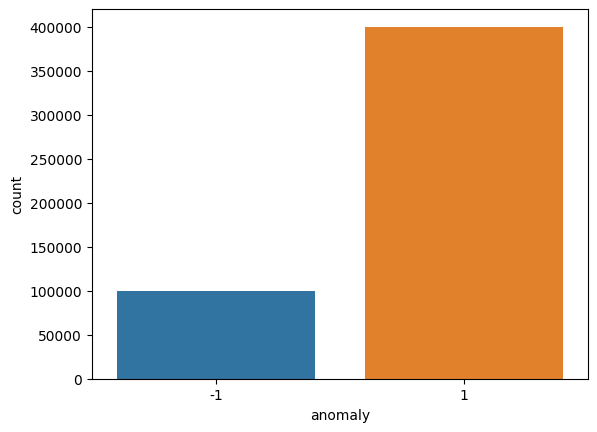

In [9]:
import seaborn as sns
sns.countplot(df,x=df['anomaly'])

In [10]:
df

,Petty Exp,LIC,Equity,Trips,Unusual Spent,Salary,Cash,Unusual Credits,anomaly
0,7379,62,30495,22535,6769,35390,93571,53405,1
1,8777,4684,42641,20216,7775,10398,19718,55499,1
2,6066,3602,21151,22900,9148,41287,47188,56695,1
3,3934,2432,20570,12799,1663,36410,115989,21583,1
4,8393,1626,47398,3797,13153,24533,166810,56545,1
...,...,...,...,...,...,...,...,...,...
499995,55,2330,45201,15261,1663,49642,20351,83606,-1
499996,7879,3089,47497,8973,14111,22615,92787,11531,1
499997,8393,3621,33525,24854,13516,36410,66590,71965,1
499998,8647,1773,25820,24854,13584,22615,60177,62493,1


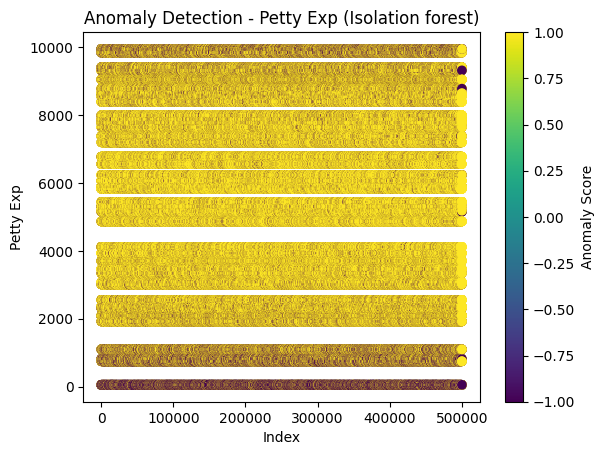

In [11]:
plt.scatter(df.index, df['Petty Exp'], c=df['anomaly'], cmap='viridis')
plt.title('Anomaly Detection - Petty Exp (Isolation forest)')
plt.xlabel('Index')
plt.ylabel('Petty Exp')
plt.colorbar(label='Anomaly Score')
plt.show()

In [12]:
#training DBSCAN model 
from sklearn.cluster import DBSCAN 
modelDB=DBSCAN(eps=0.1)

In [13]:
modelDB.fit(df)

DBSCAN(eps=0.1)

In [14]:
df['anomaly'] = modelDB.labels_==-1

In [15]:
df

,Petty Exp,LIC,Equity,Trips,Unusual Spent,Salary,Cash,Unusual Credits,anomaly
0,7379,62,30495,22535,6769,35390,93571,53405,True
1,8777,4684,42641,20216,7775,10398,19718,55499,True
2,6066,3602,21151,22900,9148,41287,47188,56695,True
3,3934,2432,20570,12799,1663,36410,115989,21583,True
4,8393,1626,47398,3797,13153,24533,166810,56545,True
...,...,...,...,...,...,...,...,...,...
499995,55,2330,45201,15261,1663,49642,20351,83606,True
499996,7879,3089,47497,8973,14111,22615,92787,11531,True
499997,8393,3621,33525,24854,13516,36410,66590,71965,True
499998,8647,1773,25820,24854,13584,22615,60177,62493,True


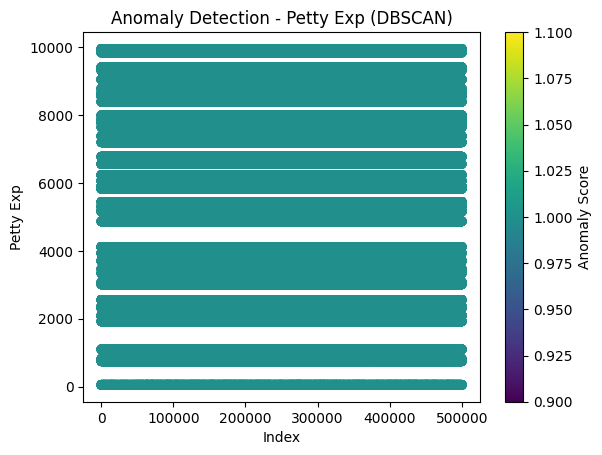

In [16]:
plt.scatter(df.index, df['Petty Exp'], c=df['anomaly'], cmap='viridis')
plt.title('Anomaly Detection - Petty Exp (DBSCAN)')
plt.xlabel('Index')
plt.ylabel('Petty Exp')
plt.colorbar(label='Anomaly Score')
plt.show()


In [17]:
from sklearn.neighbors import LocalOutlierFactor #local outlier factor
modelLOTL = LocalOutlierFactor(n_neighbors=20,algorithm='auto', leaf_size=30, metric='minkowski')
modelLOTL.fit(df)

LocalOutlierFactor()

In [18]:
anomaly_scores = modelLOTL.negative_outlier_factor_
anomaly_mask = anomaly_scores < -1.25
anomaly_indices = df.index[anomaly_mask]


C:\Users\vktaw\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


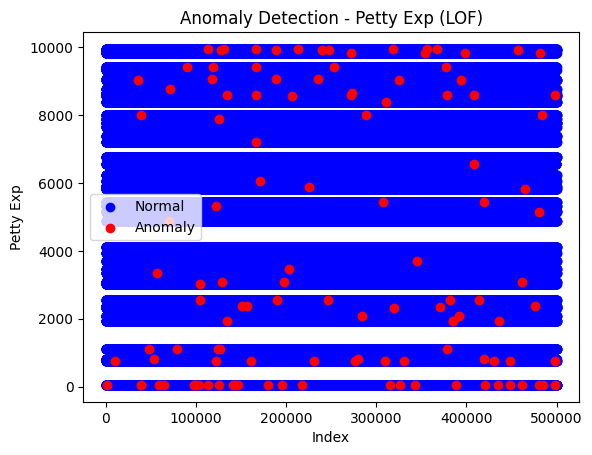

In [19]:
plt.scatter(df.index, df['Petty Exp'], c='blue', label='Normal')
plt.scatter(anomaly_indices, df.loc[anomaly_indices, 'Petty Exp'], c='red', label='Anomaly')
plt.title('Anomaly Detection - Petty Exp (LOF)')
plt.xlabel('Index')
plt.ylabel('Petty Exp')
plt.legend()
plt.show()


In [20]:
num_anomalies = sum(anomaly_mask)
print("Number of anomalies detected:", num_anomalies)

Number of anomalies detected: 121
